# Init

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

# from scipy.stats import mode
from scipy.stats import shapiro

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics

# Context

In [3]:
df = pd.read_csv('melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df = df[['Price', 'Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]

In [6]:
def summary_table(df):
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes,
                                  null = df.isna().sum(),
                                  null_pct = round(df.isna().sum() / len(df) *100,2),
                                  unique = df.nunique(),
                                  uniqueSample = [list(df[i].drop_duplicates().sample(2)) for i in df.columns])
                           ).reset_index(drop=True)
    summary['unique_pct'] = round(summary['unique'] / len(df) *100,2)
    return summary

summary_table(df)

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,Price,float64,0,0.00,2204,"[1912500.0, 3510000.0]",16.23
1,Suburb,object,0,0.00,314,"[North Warrandyte, Clayton]",2.31
2,Address,object,0,0.00,13378,"[34 Booth St, 5/319 Buckley St]",98.51
3,Rooms,int64,0,0.00,9,"[7, 3]",0.07
4,Type,object,0,0.00,3,"[h, t]",0.02
5,Method,object,0,0.00,5,"[VB, SP]",0.04
6,SellerG,object,0,0.00,268,"[Leyton, Ham]",1.97
7,Date,object,0,0.00,58,"[24/09/2016, 3/06/2017]",0.43
8,Distance,float64,0,0.00,202,"[27.1, 1.3]",1.49
9,Postcode,float64,0,0.00,198,"[3154.0, 3089.0]",1.46


# Cleaning

## Unnecessary Columns

In [7]:
df = df.drop(columns=['Address', 'Lattitude', 'Longtitude']) # too many unique values
df.head()

,Price,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,1480000.0,Abbotsford,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
1,1035000.0,Abbotsford,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,1465000.0,Abbotsford,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,850000.0,Abbotsford,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
4,1600000.0,Abbotsford,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0


## Null Val

In [8]:
df.isna().sum()

Price               0
Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [9]:
df.isna().sum()[df.isna().sum() > 0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

### Impute Council Area based on Postcode

In [10]:
df['Postcode'].nunique()

198

In [11]:
council_post = df.groupby(by=['Postcode', 'CouncilArea']).count()['Price'].index.tolist()
# council_post
council_dict = {k:v for k, v in council_post}
# len(council_dict)
council_dict

{3000.0: 'Melbourne',
 3002.0: 'Melbourne',
 3003.0: 'Melbourne',
 3006.0: 'Port Phillip',
 3008.0: 'Melbourne',
 3011.0: 'Maribyrnong',
 3012.0: 'Maribyrnong',
 3013.0: 'Maribyrnong',
 3015.0: 'Hobsons Bay',
 3016.0: 'Hobsons Bay',
 3018.0: 'Hobsons Bay',
 3019.0: 'Maribyrnong',
 3020.0: 'Brimbank',
 3021.0: 'Brimbank',
 3022.0: 'Brimbank',
 3023.0: 'Melton',
 3024.0: 'Wyndham',
 3025.0: 'Hobsons Bay',
 3027.0: 'Wyndham',
 3028.0: 'Hobsons Bay',
 3029.0: 'Wyndham',
 3030.0: 'Wyndham',
 3031.0: 'Moonee Valley',
 3032.0: 'Moonee Valley',
 3033.0: 'Moonee Valley',
 3034.0: 'Moonee Valley',
 3036.0: 'Brimbank',
 3037.0: 'Melton',
 3038.0: 'Brimbank',
 3039.0: 'Moonee Valley',
 3040.0: 'Moonee Valley',
 3041.0: 'Moonee Valley',
 3042.0: 'Moonee Valley',
 3043.0: 'Moreland',
 3044.0: 'Moreland',
 3046.0: 'Moreland',
 3047.0: 'Hume',
 3048.0: 'Hume',
 3049.0: 'Hume',
 3051.0: 'Melbourne',
 3052.0: 'Melbourne',
 3053.0: 'Melbourne',
 3054.0: 'Yarra',
 3055.0: 'Moreland',
 3056.0: 'Moreland',


In [12]:
pd.set_option('display.max_rows', 10)

In [13]:
def fill_council(data):
    try:
        if pd.isna(data['CouncilArea']):
            return council_dict[data['Postcode']]
        else:
            return data['CouncilArea']
    except KeyError:
        pass

In [14]:
df['CouncilArea'] = df.apply(fill_council, axis=1)

### Impute BuildingArea based on Type

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

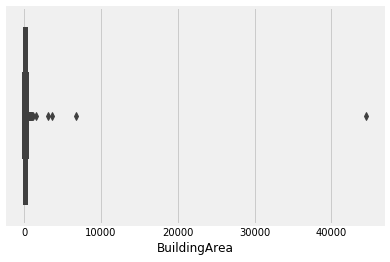

In [15]:
# sns.distplot(df['BuildingArea'])
sns.boxplot(df['BuildingArea'])
df.BuildingArea.describe()

In [16]:
df.groupby(by=['Type']).agg(['min', 'max', 'mean', 'median', 'count'])['BuildingArea']

,min,max,mean,median,count
Type,,,,,
h,0.0,44515.0,176.866248,144.0,4860
t,0.0,3558.0,140.046323,130.0,686
u,1.0,1561.0,80.737121,75.0,1584


In [17]:
type_build = df.groupby(by=['Type']).median()['BuildingArea']
build_dict = {k:v for k, v in zip(type_build.index, type_build.values)}
build_dict

{'h': 144.0, 't': 130.0, 'u': 75.0}

In [18]:
def fill_building_area(data):
    try:
        if pd.isna(data['BuildingArea']):
            return build_dict[data['Type']]
        else:
            return data['BuildingArea']
    except KeyError:
        pass

In [19]:
df['BuildingArea'] = df.apply(fill_building_area, axis=1)

### Impute Car based on Type

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
df.groupby(by=['Type', 'Car']).count()['Price']

Type  Car 
h     0.0      846
      1.0     2681
      2.0     4524
      3.0      702
      4.0      499
      5.0       63
      6.0       54
      7.0        7
      8.0        9
      9.0        1
      10.0       3
t     0.0       15
      1.0      492
      2.0      584
      3.0       19
      4.0        4
u     0.0      165
      1.0     2336
      2.0      483
      3.0       27
      4.0        3
      7.0        1
Name: Price, dtype: int64

In [22]:
pd.set_option('display.max_rows', 10)

In [23]:
df.groupby(by=['Type']).agg(['min', 'max', 'mean', 'median', 'count'])['Car']

,min,max,mean,median,count
Type,,,,,
h,0.0,10.0,1.771222,2.0,9389
t,0.0,4.0,1.555655,2.0,1114
u,0.0,7.0,1.128358,1.0,3015


In [24]:
car_dict = {'h': 2.0, 't': 2.0, 'u': 1.0}

In [25]:
def fill_car(data):
    try:
        if pd.isna(data['Car']):
            return car_dict[data['Type']]
        else:
            return data['Car']
    except KeyError:
        pass

In [26]:
df['Car'] = df.apply(fill_car, axis=1)

### Impute YearBuild based on Suburb

In [27]:
df.describe(exclude='number')

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13577,13580
unique,314,3,5,268,58,33,8
top,Reservoir,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,9449,9022,1565,473,1258,4695


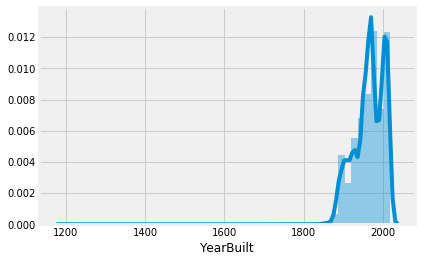

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

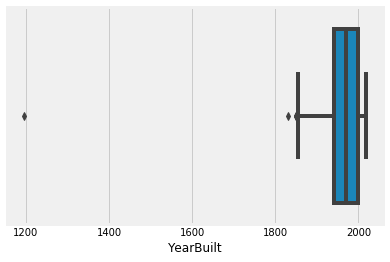

In [28]:
sns.distplot(df['YearBuilt'])
plt.show()
sns.boxplot(df['YearBuilt'])
df.YearBuilt.describe()

In [29]:
def out_iqr(df, col):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name'''
    
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    n_out = df[(df[col]<=lower)|(df[col]>=upper)].shape[0]
    n_pct = round(n_out/len(df[col])*100, 2)
    
    return 'Identified outlier in {}: \n {} records, \n {} percent, \n lower threshold: {} \n upper threshold: {} \n'.format(
        col, n_out, n_pct, round(lower, 3), round(upper, 3))

print(out_iqr(df, 'YearBuilt'))

Identified outlier in YearBuilt: 
 6 records, 
 0.04 percent, 
 lower threshold: 1851.5 
 upper threshold: 2087.5 



In [30]:
df_normal_year = df[~ (df['YearBuilt'] < 1851.5) | (df['YearBuilt'] > 2087.5)]

In [31]:
pd.set_option('display.max_rows', None)
df_normal_year.groupby(by=['Suburb']).agg(['mean', 'median', 'count'])['YearBuilt']

,mean,median,count
Suburb,,,
Abbotsford,1945.184211,1935.0,38
Aberfeldie,1979.100000,1980.0,30
Airport West,1984.476190,1980.0,42
Albanvale,1980.000000,1980.0,2
Albert Park,1903.756757,1900.0,37
Albion,1962.192308,1962.5,26
Alphington,1962.705882,1965.0,17
Altona,1981.973684,1982.5,38
Altona Meadows,1987.500000,1989.5,4


In [32]:
pd.set_option('display.max_rows', 10)

In [33]:
suburb_year = round(df_normal_year.groupby(by=['Suburb']).median()['YearBuilt'])
year_dict = {k:v for k, v in zip(suburb_year.index, suburb_year.values)}
year_dict

{'Abbotsford': 1935.0,
 'Aberfeldie': 1980.0,
 'Airport West': 1980.0,
 'Albanvale': 1980.0,
 'Albert Park': 1900.0,
 'Albion': 1962.0,
 'Alphington': 1965.0,
 'Altona': 1982.0,
 'Altona Meadows': 1990.0,
 'Altona North': 1965.0,
 'Ardeer': 1965.0,
 'Armadale': 1960.0,
 'Ascot Vale': 1920.0,
 'Ashburton': 1950.0,
 'Ashwood': 1970.0,
 'Aspendale': 1960.0,
 'Aspendale Gardens': nan,
 'Attwood': nan,
 'Avondale Heights': 1970.0,
 'Bacchus Marsh': nan,
 'Balaclava': 1960.0,
 'Balwyn': 1975.0,
 'Balwyn North': 1960.0,
 'Bayswater': 1972.0,
 'Bayswater North': 1980.0,
 'Beaconsfield': 2005.0,
 'Beaconsfield Upper': 1960.0,
 'Beaumaris': 1980.0,
 'Bellfield': 1958.0,
 'Bentleigh': 1965.0,
 'Bentleigh East': 1970.0,
 'Berwick': 2000.0,
 'Black Rock': 1970.0,
 'Blackburn': 1957.0,
 'Blackburn North': 1965.0,
 'Blackburn South': 1970.0,
 'Bonbeach': 1960.0,
 'Boronia': 1970.0,
 'Box Hill': 1950.0,
 'Braybrook': 1970.0,
 'Briar Hill': 1980.0,
 'Brighton': 1970.0,
 'Brighton East': 1960.0,
 'Broad

In [34]:
def fill_year(data):
    try:
        if pd.isna(data['YearBuilt']):
            return year_dict[data['Suburb']]
        else:
            return data['YearBuilt']
    except KeyError:
        pass

In [35]:
df['YearBuilt'] = df.apply(fill_year, axis=1)

### Result

In [36]:
df.isna().sum()[df.isna().sum() > 0]

YearBuilt      18
CouncilArea     3
dtype: int64

In [37]:
# drop only 21 records
df = df.dropna().reset_index(drop=True)
df.info()

# turns out only 19 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13561 entries, 0 to 13560
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13561 non-null  float64
 1   Suburb         13561 non-null  object 
 2   Rooms          13561 non-null  int64  
 3   Type           13561 non-null  object 
 4   Method         13561 non-null  object 
 5   SellerG        13561 non-null  object 
 6   Date           13561 non-null  object 
 7   Distance       13561 non-null  float64
 8   Postcode       13561 non-null  float64
 9   Bedroom2       13561 non-null  float64
 10  Bathroom       13561 non-null  float64
 11  Car            13561 non-null  float64
 12  Landsize       13561 non-null  float64
 13  BuildingArea   13561 non-null  float64
 14  YearBuilt      13561 non-null  float64
 15  CouncilArea    13561 non-null  object 
 16  Regionname     13561 non-null  object 
 17  Propertycount  13561 non-null  float64
dtypes: flo

In [38]:
df

,Price,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,1480000.0,Abbotsford,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,144.0,1935.0,Yarra,Northern Metropolitan,4019.0
1,1035000.0,Abbotsford,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,1465000.0,Abbotsford,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,850000.0,Abbotsford,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,144.0,1935.0,Yarra,Northern Metropolitan,4019.0
4,1600000.0,Abbotsford,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13556,1245000.0,Wheelers Hill,4,h,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,144.0,1981.0,Monash,South-Eastern Metropolitan,7392.0
13557,1031000.0,Williamstown,3,h,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,Hobsons Bay,Western Metropolitan,6380.0
13558,1170000.0,Williamstown,3,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.0,1997.0,Hobsons Bay,Western Metropolitan,6380.0
13559,2500000.0,Williamstown,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,Hobsons Bay,Western Metropolitan,6380.0


## Outliers

In [39]:
df.describe().columns

Index(['Price', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

In [40]:
num_feats = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 
             'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 
             'Propertycount'
            ]
cat_feats = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'
            ]

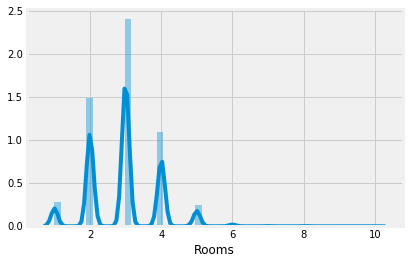

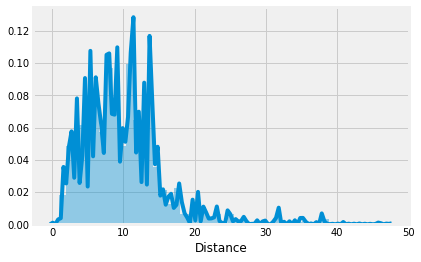

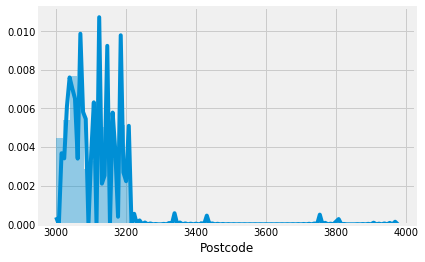

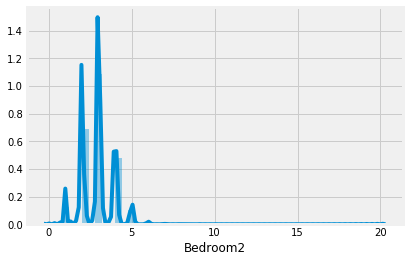

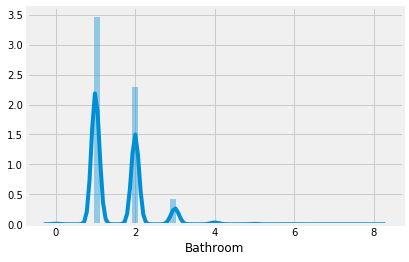

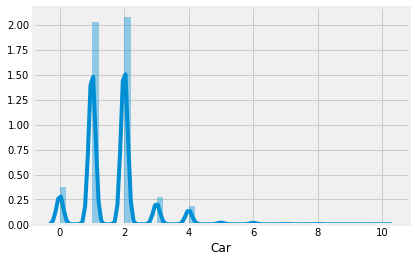

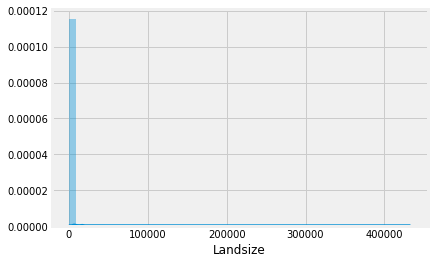

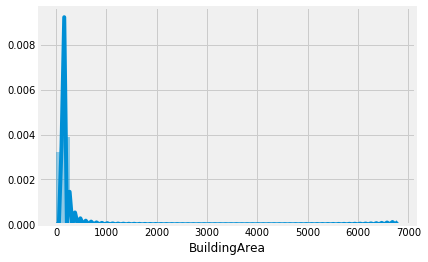

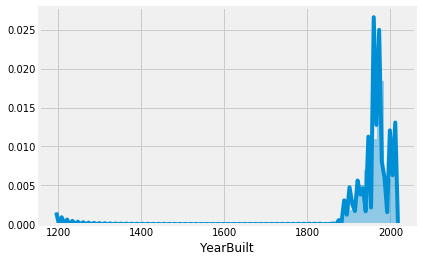

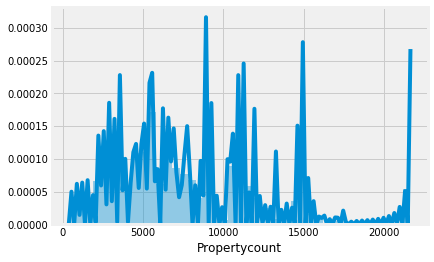

In [41]:
for column in num_feats:
    sns.distplot(df[column], kde_kws={'bw':0.1})
    plt.show()

In [42]:
def normal_shapiro(df, col, alpha):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name
       alpha = Threshold level (float)'''
    
    stat, p = shapiro(df[col])
    print(col)
    print(' Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(' Distribution looks Gaussian (fail to reject H0)')
    else:
        print(' Distribution does not look Gaussian (reject H0)')
    print('\n')
    
for feat in num_feats:
    normal_shapiro(df, feat, 0.05)

Rooms
 Statistics=0.898, p=0.000
 Distribution does not look Gaussian (reject H0)


Distance
 Statistics=0.891, p=0.000
 Distribution does not look Gaussian (reject H0)


Postcode
 Statistics=0.696, p=0.000
 Distribution does not look Gaussian (reject H0)


Bedroom2
 Statistics=0.886, p=0.000
 Distribution does not look Gaussian (reject H0)


Bathroom
 Statistics=0.725, p=0.000
 Distribution does not look Gaussian (reject H0)


Car
 Statistics=0.823, p=0.000
 Distribution does not look Gaussian (reject H0)


Landsize
 Statistics=0.029, p=0.000
 Distribution does not look Gaussian (reject H0)


BuildingArea
 Statistics=0.396, p=0.000
 Distribution does not look Gaussian (reject H0)


YearBuilt
 Statistics=0.925, p=0.000
 Distribution does not look Gaussian (reject H0)


Propertycount
 Statistics=0.924, p=0.000
 Distribution does not look Gaussian (reject H0)




C:\Users\gabri\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


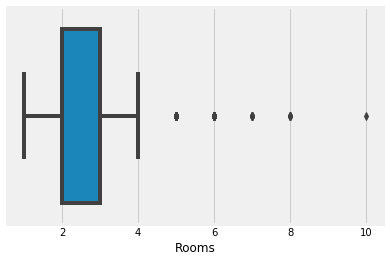

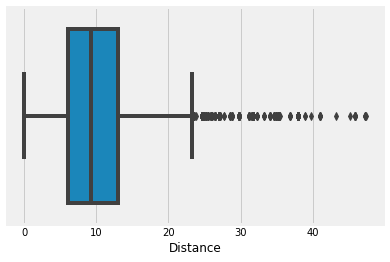

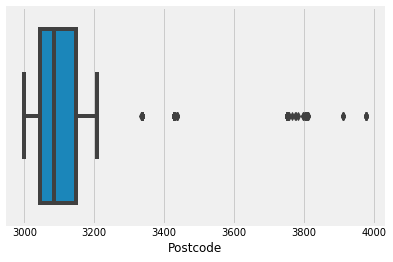

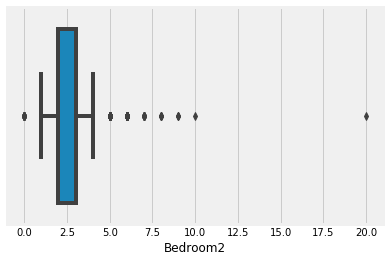

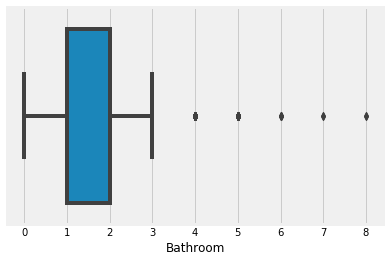

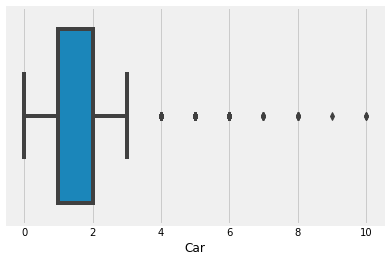

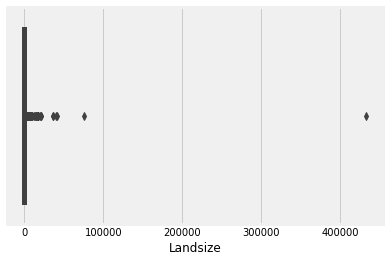

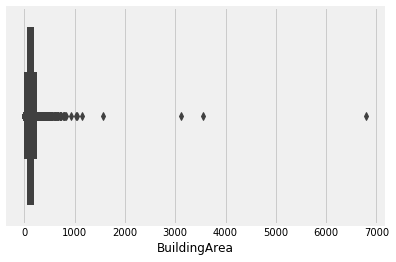

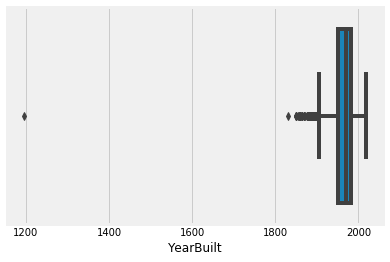

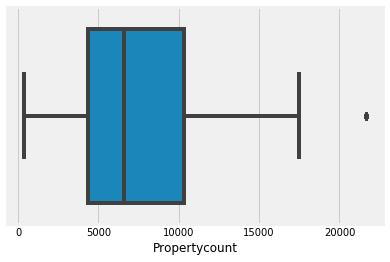

In [43]:
for feat in num_feats:
    sns.boxplot(df[feat])
    plt.show()

In [44]:
def out_iqr(df, col):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name'''
    
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    n_out = df[(df[col]<=lower)|(df[col]>=upper)].shape[0]
    n_pct = round(n_out/len(df[col])*100, 2)
    
    return 'Identified outlier in {}: \n {} records, \n {} percent, \n lower threshold: {} \n upper threshold: {} \n'.format(
        col, n_out, n_pct, round(lower, 3), round(upper, 3))

for column in num_feats:
    print(out_iqr(df, column))

Identified outlier in Rooms: 
 681 records, 
 5.02 percent, 
 lower threshold: 0.5 
 upper threshold: 4.5 

Identified outlier in Distance: 
 401 records, 
 2.96 percent, 
 lower threshold: -4.25 
 upper threshold: 23.35 

Identified outlier in Postcode: 
 200 records, 
 1.47 percent, 
 lower threshold: 2888.0 
 upper threshold: 3304.0 

Identified outlier in Bedroom2: 
 654 records, 
 4.82 percent, 
 lower threshold: 0.5 
 upper threshold: 4.5 

Identified outlier in Bathroom: 
 143 records, 
 1.05 percent, 
 lower threshold: -0.5 
 upper threshold: 3.5 

Identified outlier in Car: 
 643 records, 
 4.74 percent, 
 lower threshold: -0.5 
 upper threshold: 3.5 

Identified outlier in Landsize: 
 363 records, 
 2.68 percent, 
 lower threshold: -534.0 
 upper threshold: 1362.0 

Identified outlier in BuildingArea: 
 1065 records, 
 7.85 percent, 
 lower threshold: 24.0 
 upper threshold: 216.0 

Identified outlier in YearBuilt: 
 834 records, 
 6.15 percent, 
 lower threshold: 1903.5 
 up

In [45]:
df[num_feats].describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.00000,13561.000000,13561.000000
mean,2.937836,10.115958,3105.010619,2.914534,1.534031,1.611459,546.580931,137.19389,1964.280732,7461.850159
std,0.955831,5.821674,89.823570,0.966013,0.691848,0.960648,3908.747229,95.84641,31.652690,4376.805252
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,389.000000
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,96.00000,1950.000000,4380.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,144.00000,1970.000000,6567.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,144.00000,1981.000000,10331.000000
max,10.000000,47.400000,3977.000000,20.000000,8.000000,10.000000,433014.000000,6791.00000,2018.000000,21650.000000


## Duplicate Val

In [46]:
df[df.duplicated(keep='first')]

,Price,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount


# Preprocessing

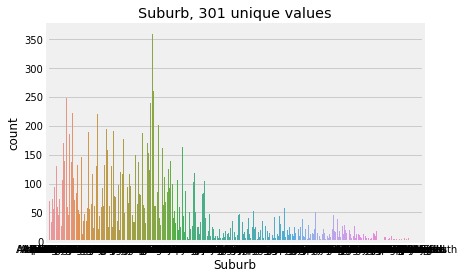

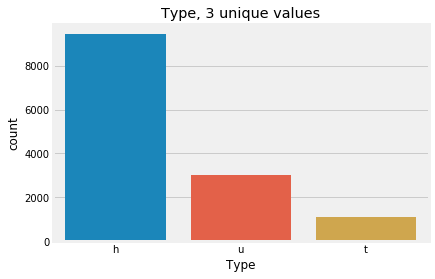

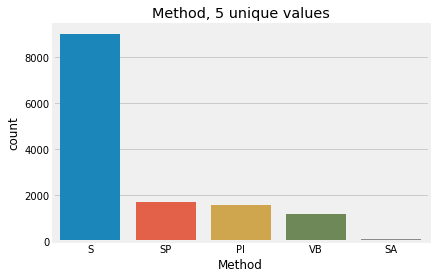

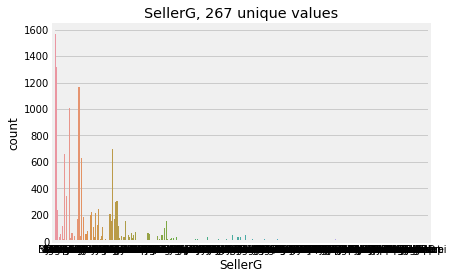

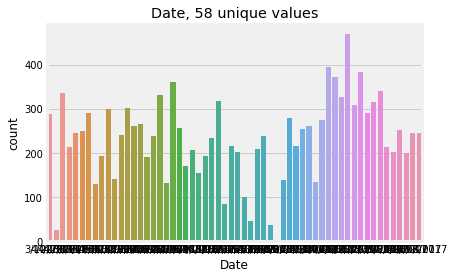

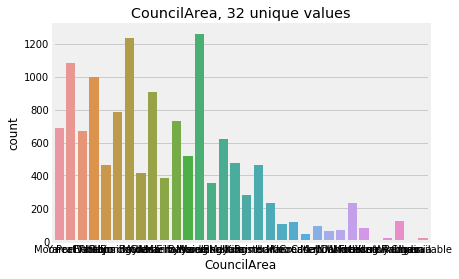

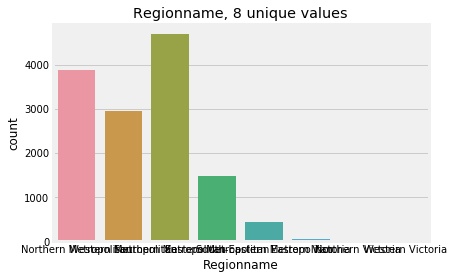

In [47]:
for feat in cat_feats:
    sns.countplot(df[feat])
    plt.title(f'{feat}, {df[feat].nunique()} unique values')
    plt.show()

In [48]:
df[cat_feats].nunique()[df[cat_feats].nunique() > 20]

Suburb         301
SellerG        267
Date            58
CouncilArea     32
dtype: int64

In [49]:
# for simple exercise, drop above columns
df = df.drop(columns=['Suburb', 'SellerG', 'Date', 'CouncilArea'])
cat_feats = ['Type', 'Method', 'Regionname']

In [50]:
df[cat_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13561 entries, 0 to 13560
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type        13561 non-null  object
 1   Method      13561 non-null  object
 2   Regionname  13561 non-null  object
dtypes: object(3)
memory usage: 159.0+ KB


In [51]:
df[cat_feats].isna().sum()

Type          0
Method        0
Regionname    0
dtype: int64

In [52]:
label_encoder = LabelEncoder()
for feat in cat_feats:
    df[feat] = label_encoder.fit_transform(df[feat])
    print({index: label for index, label in enumerate(label_encoder.classes_)})
    print(f'{feat} encoded')

{0: 'h', 1: 't', 2: 'u'}
Type encoded
{0: 'PI', 1: 'S', 2: 'SA', 3: 'SP', 4: 'VB'}
Method encoded
{0: 'Eastern Metropolitan', 1: 'Eastern Victoria', 2: 'Northern Metropolitan', 3: 'Northern Victoria', 4: 'South-Eastern Metropolitan', 5: 'Southern Metropolitan', 6: 'Western Metropolitan', 7: 'Western Victoria'}
Regionname encoded


# Unscaled Data

In [53]:
df.shape

(13561, 14)

In [54]:
X = df.drop(columns='Price')
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 88)

for data in [x_train, x_test, y_train, y_test]:
    print(data.shape)

(10848, 13)
(2713, 13)
(10848,)
(2713,)


In [55]:
def create_MLR_models(dataset, x_train, x_test, y_train, y_test):
    '''Creates multivariate linear regression models
    dataset = Dataframe'''

    # Regular (multivariate) linear regression
    linear_regression = LinearRegression()
    # Lasso: Linear Model trained with L1 prior as regularizer (aka the Lasso)
    lasso = Lasso()
    # Ridge: Linear least squares with l2 regularization.
    ridge = Ridge()
    # Elastic Net: Linear regression with combined L1 and L2 priors as regularizer.
    elastic_net = ElasticNet()

    models = [linear_regression, lasso, ridge, elastic_net]

    # feed train data to models
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mae = metrics.mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        r2 = metrics.r2_score(y_test, y_pred)
        target_range = y.max() - y.min()
        nmae = mae/target_range
        nrmse = rmse/target_range

        print(f'Model: {model}')
        print(f'm = {model.coef_}, c= {model.intercept_}')
        print(f'MAE: {round(mae, 4)} ({round(nmae*100, 2)}%)', f'RMSE: {round(rmse, 4)} ({round(nrmse*100, 2)}%)',
              f'R2 Score: {round(r2*100, 2)}%\n')
        
#         plt.plot(x_test, y_test, 'k.')
#         plt.plot(x_test, y_pred, 'r.')
#         plt.show()

In [56]:
def create_multivariate_polynomial_regression_model(dataset, degree, x_train, x_test, y_train, y_test):
    '''Creates a polynomial regression model for the given degree
    dataset = Dataframe
    degree = Polynomial features by nth degree (int >= 2)'''
    
    poly = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    
    poly.fit(x_train, y_train)
    y_pred = poly.predict(x_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    target_range = dataset['Price'].mean()
    nmae = mae/target_range
    nrmse = rmse/target_range
    
    print(f'Polynomial Regression Model, dataset={dataset.shape}, degree={degree}')
    print(f'MAE: {round(mae, 4)} ({round(nmae*100, 2)}%)', f'RMSE: {round(rmse, 4)} ({round(nrmse*100, 2)}%)',
          f'R2 Score: {round(r2*100, 2)}%\n')
    
#     plt.plot(x_test, y_test, 'k.')
#     plt.plot(x_test, y_pred, 'r.')
#     plt.show()

## Model

In [57]:
create_MLR_models(df, x_train, x_test, y_train, y_test)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
m = [ 1.52786692e+05 -1.60869718e+05 -8.29588788e+03 -4.57264308e+04
  1.85266069e+03  1.82172624e+04  2.17171561e+05  5.56945702e+04
  3.62193293e+00  9.87340704e+02 -3.19483244e+03  1.57394961e+04
 -2.28061196e+00], c= 1055518.1671834325
MAE: 293802.2295 (3.3%) RMSE: 445010.5609 (4.99%) R2 Score: 51.22%

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
m = [ 1.52786989e+05 -1.60867949e+05 -8.29511266e+03 -4.57262862e+04
  1.85265799e+03  1.82171504e+04  2.17169438e+05  5.56938794e+04
  3.62194241e+00  9.87354873e+02 -3.19484206e+03  1.57392515e+04
 -2.28063703e+00], c= 1055544.9318695625
MAE: 293802.0808 (3.3%) RMSE: 445011.0521 (4.99%) R2 Score: 51.22%

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False

In [58]:
for i in range(2, 5):
    create_multivariate_polynomial_regression_model(df, i, x_train, x_test, y_train, y_test)

Polynomial Regression Model, dataset=(13561, 14), degree=2
MAE: 255854.9976 (23.78%) RMSE: 843836.8132 (78.42%) R2 Score: -75.39%

Polynomial Regression Model, dataset=(13561, 14), degree=3
MAE: 1154485.4309 (107.28%) RMSE: 29534894.047 (2744.61%) R2 Score: -214757.34%

Polynomial Regression Model, dataset=(13561, 14), degree=4
MAE: 6692423.3583 (621.91%) RMSE: 271104161.1915 (25193.12%) R2 Score: -18102949.3%



# Scaled Data

In [59]:
robust = RobustScaler()
df_robust = pd.DataFrame(robust.fit_transform(df[num_feats]), columns=num_feats)
df_robust = pd.concat([df_robust, df.drop(columns=num_feats)], axis=1)
df_robust.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Price,Type,Method,Regionname
count,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,1.356100e+04,13561.000000,13561.000000,13561.000000
mean,-0.062164,0.132747,0.202025,-0.085466,0.534031,-0.388541,0.224854,-0.141794,-0.184493,0.150370,1.076104e+06,0.526731,1.406312,3.766905
std,0.955831,0.843721,0.863688,0.966013,0.691848,0.960648,8.246302,1.996800,1.021055,0.735474,6.395542e+05,0.833063,1.118602,2.024339
min,-2.000000,-1.333333,-0.807692,-3.000000,-1.000000,-2.000000,-0.928270,-3.000000,-24.967742,-1.038145,8.500000e+04,0.000000,0.000000,0.000000
25%,-1.000000,-0.449275,-0.384615,-1.000000,0.000000,-1.000000,-0.554852,-1.000000,-0.645161,-0.367501,6.500000e+05,0.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.040000e+05,0.000000,1.000000,5.000000
75%,0.000000,0.550725,0.615385,0.000000,1.000000,0.000000,0.445148,0.000000,0.354839,0.632499,1.330000e+06,1.000000,1.000000,5.000000
max,7.000000,5.536232,8.586538,17.000000,7.000000,8.000000,912.603376,138.479167,1.548387,2.534532,9.000000e+06,2.000000,4.000000,7.000000


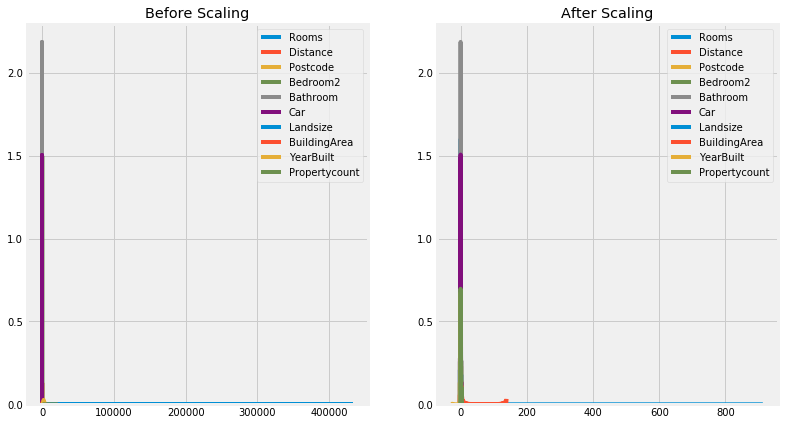

In [60]:
def viz_scaling(ori_dataset, new_dataset, feats):
    '''Function to visualize shape of features' distribution before and after scaling
       ori_dataset  = original dataset name
       new_dataset = new dataset name
       feats = list of features'''
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
    
    ax1.set_title('Before Scaling')
    for feat in feats:
        sns.kdeplot(ori_dataset[feat], ax = ax1, bw=0.1)
    
    ax2.set_title('After Scaling')
    for feat in feats:
        sns.kdeplot(new_dataset[feat], ax = ax2, bw=0.1)
    
viz_scaling(df, df_robust, num_feats)    

In [61]:
X_rob = df_robust.drop(columns='Price')
y_rob = df_robust['Price']

x_train_rob, x_test_rob, y_train_rob, y_test_rob = train_test_split(X_rob, y_rob, test_size = 0.20,
                                                    random_state = 88)

for data in [x_train_rob, x_test_rob, y_train_rob, y_test_rob]:
    print(data.shape)

(10848, 13)
(2713, 13)
(10848,)
(2713,)


## Model

In [62]:
create_MLR_models(df_robust, x_train_rob, x_test_rob, y_train_rob, y_test_rob)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
m = [ 152786.69215828 -315512.37218568  192676.71141172   18217.2624068
  217171.56113212   55694.570191      1716.79620919   47392.35377958
  -99039.80566049  -13571.92175693 -160869.71817503   -8295.88788373
   15739.49607093], c= 1024987.1521144083
MAE: 293802.2295 (3.3%) RMSE: 445010.5609 (4.99%) R2 Score: 51.22%

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
m = [ 152786.62150469 -315508.90804678  192673.9310755    18217.24828329
  217170.19003145   55693.46472553    1716.78877071   47392.58111053
  -99039.65776376  -13569.86162792 -160868.14164479   -8295.04158128
   15739.45432361], c= 1024985.4279389795
MAE: 293802.0432 (3.3%) RMSE: 445010.697 (4.99%) R2 Score: 51.22%

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=Non

# Feature Selection

            Feat        Score
0          Rooms  4442.003266
3       Bedroom2  3973.584058
4       Bathroom  3784.060005
10          Type  2822.339036
7   BuildingArea  1602.779099
8      YearBuilt  1144.504122
5            Car   822.439287
1       Distance   366.027523
2       Postcode   167.576942
12    Regionname    85.543962


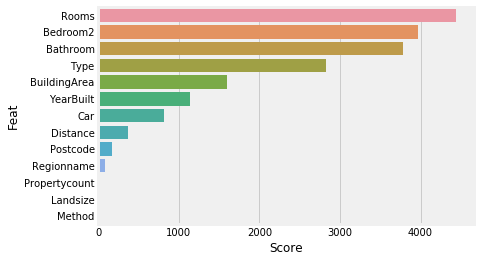

In [76]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)

fit = bestfeatures.fit(X_rob, y_rob)

kbest = pd.DataFrame(zip(X_rob.columns, fit.scores_), columns = ['Feat','Score'])
print(kbest.nlargest(10,'Score'))

sns.barplot(x='Score', y='Feat', data=kbest.sort_values(by='Score', ascending=False))

In [77]:
sel_feats = [i for i in kbest.nlargest(10,'Score')['Feat']]

In [78]:
X_sel = df_robust[sel_feats]
y_sel = df_robust['Price']

x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size = 0.20,
                                                    random_state = 88)

for data in [x_train_sel, x_test_sel, y_train_sel, y_test_sel]:
    print(data.shape)

(10848, 10)
(2713, 10)
(10848,)
(2713,)


## Model

In [79]:
create_MLR_models(df_robust, x_train_sel, x_test_sel, y_train_sel, y_test_sel)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
m = [ 152860.35669075   18542.78073912  218060.37276607 -162173.05185019
   47415.73169505  -99257.42821712   55375.12605756 -313913.47193066
  191539.05820755   16329.68833052], c= 1009519.3679793285
MAE: 294143.4503 (3.3%) RMSE: 445329.9155 (5.0%) R2 Score: 51.15%

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
m = [ 152877.15956401   18529.19144103  218057.13778416 -162169.92950242
   47415.66202346  -99257.02519962   55373.76683551 -313910.79235894
  191536.72020267   16329.50677162], c= 1009519.6896088716
MAE: 294143.1994 (3.3%) RMSE: 445329.8959 (5.0%) R2 Score: 51.15%

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
m = [ 152752.88570147   18657.570

In [82]:
df_robust.corr()['Price'].abs().sort_values(ascending=False)[1:11]

Rooms           0.496754
Bedroom2        0.476067
Bathroom        0.467107
Type            0.415078
BuildingArea    0.325134
YearBuilt       0.278996
Car             0.239139
Distance        0.162128
Postcode        0.110491
Regionname      0.079180
Name: Price, dtype: float64

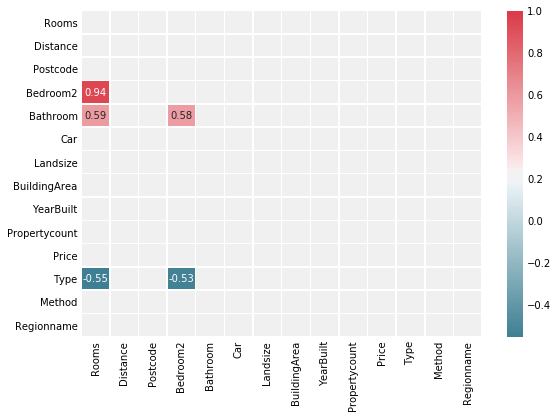

In [84]:
corr = df_robust.corr('pearson')
fig, ax = plt.subplots(figsize=(8, 6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr.where(abs(corr)>.5), cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# note
# Bedroom2 x Rooms
# Bathroom x Rooms
# Type x Rooms
# Bathroom x Bedroom2
# Type x Bedroom2

# these are top 4 features

In [85]:
df_robust.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Price',
       'Type', 'Method', 'Regionname'],
      dtype='object')

In [86]:
sel_feats = [
    'Rooms',
    'Distance',
    'Postcode',
#     'Bedroom2', 
#     'Bathroom',
    'Car',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    'Propertycount',
#     'Type',
    'Method',
    'Regionname'
]

In [87]:
X_sel = df_robust[sel_feats]
y_sel = df_robust['Price']

x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size = 0.20,
                                                    random_state = 88)

for data in [x_train_sel, x_test_sel, y_train_sel, y_test_sel]:
    print(data.shape)

(10848, 10)
(2713, 10)
(10848,)
(2713,)


## Model

In [88]:
create_MLR_models(df_robust, x_train_sel, x_test_sel, y_train_sel, y_test_sel)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
m = [ 309941.88038477 -314098.59619173  195821.39365883   77877.86364158
    2127.47220267   74605.72853354 -112533.30731658  -20514.00561976
  -10215.10056764   14647.44869394], c= 1082036.4714674405
MAE: 312013.4089 (3.5%) RMSE: 492126.7598 (5.52%) R2 Score: 40.35%

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
m = [ 309940.73065344 -314095.24532476  195818.66086953   77876.58387228
    2127.46177206   74605.73403859 -112532.93759884  -20511.88852169
  -10214.22773885   14647.42305942], c= 1082034.6158364567
MAE: 312013.3363 (3.5%) RMSE: 492126.734 (5.52%) R2 Score: 40.35%

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
m = [ 309887.64236322 -314012.31

# Hyperparameter Tuning

In [89]:
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)